Welcome to PROD ALERT 2. Thesxe results have not been peer reviewed.
     They are shown so that the development can be described as having been done openly, in retrospect, later.
     Underlying figures are already available at NHS Digital.
     
     


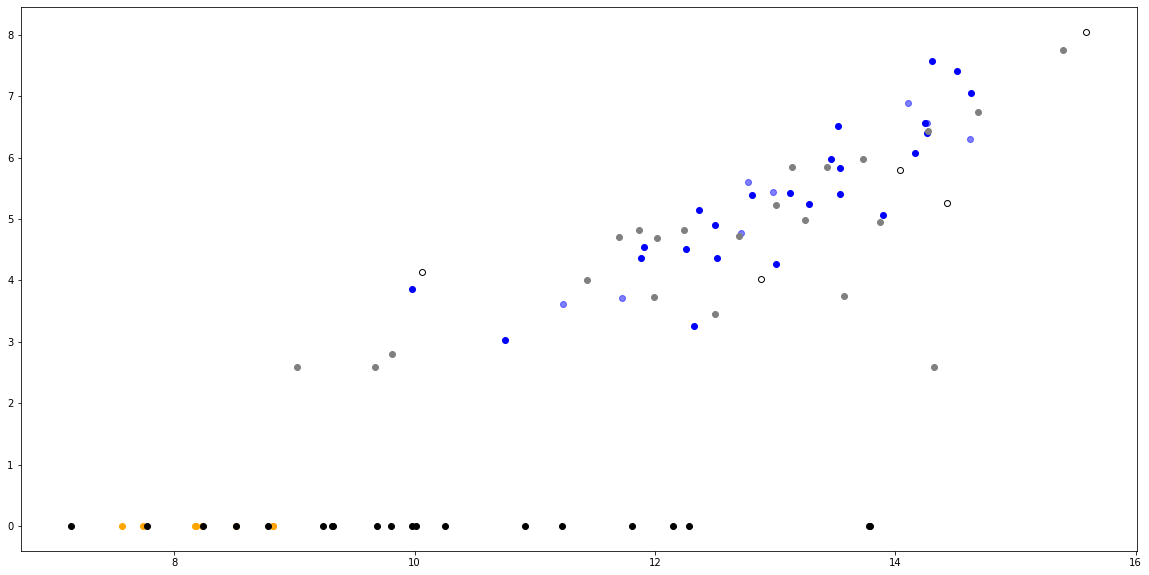

This analysis uses averages taken from the whole year things.
Firstly  the log average restraint per month for *all* non-zero restraint months.
Secondly the log average beds      per month for *all* non-zero beds      months.
There sa pretty clear trend and we trust it and use it to predict restraint in NULL reports.
Residuals in general are the diffference between a supposed trend and the reported value.
We suppose COMPLETE reports give the best trend.
Distribution of the residuals for COMPLETE reporters is normal.
The normal distribution of COMPLETE residuals supports correlation of log restraints against log beds against and drawing inferences.
Note the COMPLETE RESIDUAL mean is small because COMPLETE tend to the trend which is based on COMPLETE reporters.
Mean:  0.0007584105871212415  std deviation:  0.5800792679895149
Predicted people restrained per month in incomplete reporters:  1298.3338972152815
Based on the spread in the complete reporters the 95% confidence is:  550.41757247

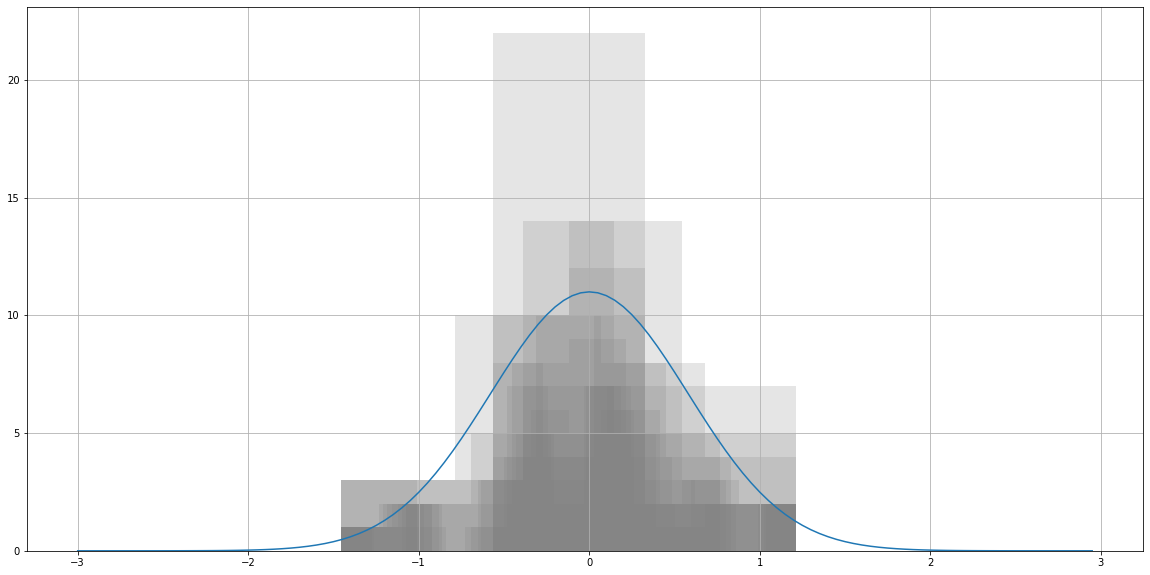

In [23]:
"""

PROD ALERT 2 CODE

Copyright © 2023 Dr Keith S Reid Cailleach Computing Ltd

keithreid@nhs.net

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the “Software”), to deal in the Software without restriction, including without limitation 
the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and 
to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions 
of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED 
TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL 
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER 
DEALINGS IN THE SOFTWARE.

"""

"""
The author can provide sensitivity models, upon reasonable request.
Preferably readers may do their own, and can fork the code here.


     SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST average size 490.833333

beds 450 	510 	490 	480 	445 	450 	530 	525 	480 	510 	515 	505 
sect 10  	10  	10  	10  	10  	10  	10  	5   	10  	10  	10  	5


     EQUILIBRIUM HEALTHCARE                    average size 527.916667
     
beds 600 	650 	630 	650 	650 	500 	470 	450 	465 	435 	435 	400 
sect 20    	20  	20  	20  	20  	15  	15  	15  	15  	15  	15  	10

Due to visual inpection small for detentions is set at effectively 500.

These are small for detentions:

SCHOEN CLINIC YORK
GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST
ALDER HEY CHILDREN'S NHS FOUNDATION TRUST
TURNING POINT
NEWMARKET HOUSE HEALTHCARE LTD
WHITTINGTON HEALTH NHS TRUST
MANCHESTER UNIVERSITY NHS FOUNDATION TRUST
NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST
NEWBRIDGE CARE SYSTEMS LTD
BRAMLEY HEALTH
REGIS HEALTHCARE LIMITED
RIVERDALE GRANGE LIMITED
SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST



Due to visual inspection small for restraint is set at effectively 1011.

     ISLE OF WIGHT NHS TRUST                    average size 1011.250000
     
beds 990 	995 	1090 	1145 	1185 	920 	1075 	905 	1000 	915 	980 	935
sect 20  	30  	25  	25  	30  	30  	25  	30  	35  	20  	20  	20
rstr 5   	15  	15  	15  	15  	20  	20  	15  	15  	15  	10  	10

These are small for restraints:

SCHOEN CLINIC YORK
GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST
ALDER HEY CHILDREN'S NHS FOUNDATION TRUST
TURNING POINT
NEWMARKET HOUSE HEALTHCARE LTD
WHITTINGTON HEALTH NHS TRUST
MANCHESTER UNIVERSITY NHS FOUNDATION TRUST
NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST
NEWBRIDGE CARE SYSTEMS LTD
BRAMLEY HEALTH
REGIS HEALTHCARE LIMITED
RIVERDALE GRANGE LIMITED
SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST
EQUILIBRIUM HEALTHCARE
BIRMINGHAM WOMEN'S AND CHILDREN'S NHS FOUNDATION TRUST
DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDATION TRUST
ACTIVE PATHWAYS
NEWBRIDGE CARE SYSTEMS
MAKING SPACE
ELLERN MEDE BARNET
CARETECH COMMUNITY SERVICES (NO.2) LIMITED
ISLE OF WIGHT NHS TRUST

"""


#       LIBRARIES

import math
import matplotlib.pyplot             as plt
import numpy                         as np
from numpy.polynomial import polynomial as P
import pandas                        as pd
import warnings

from scipy.stats import norm



# configure settings

warnings.filterwarnings('ignore')                                
pd.options.display.max_rows     = None
pd.options.display.max_columns  = None
plt.rcParams["figure.figsize"] = (20,10)

# get data

def get_verbose():
    verbose = "No" # "Yes" or "No"
    return verbose

def get_small_for_rstr():
    # smallness is handled as a configuration because it is based on a judgement
    get_small_for_rstr = ["SCHOEN CLINIC YORK",
                        "GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST",
                        "ALDER HEY CHILDREN'S NHS FOUNDATION TRUST",
                        "TURNING POINT",
                        "NEWMARKET HOUSE HEALTHCARE LTD",
                        "WHITTINGTON HEALTH NHS TRUST",
                        "MANCHESTER UNIVERSITY NHS FOUNDATION TRUST",
                        "NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST",
                        "NEWBRIDGE CARE SYSTEMS LTD",
                        "BRAMLEY HEALTH",
                        "REGIS HEALTHCARE LIMITED",
                        "RIVERDALE GRANGE LIMITED",
                        "SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST"]
    return get_small_for_rstr

def get_small_for_sect():
    # smallness is handled as a configuration because it is based on a judgement
    small_for_sect = ["SCHOEN CLINIC YORK",
                        "GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS FOUNDATION TRUST",
                        "ALDER HEY CHILDREN'S NHS FOUNDATION TRUST",
                        "TURNING POINT",
                        "NEWMARKET HOUSE HEALTHCARE LTD",
                        "WHITTINGTON HEALTH NHS TRUST",
                        "MANCHESTER UNIVERSITY NHS FOUNDATION TRUST",
                        "NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST",
                        "NEWBRIDGE CARE SYSTEMS LTD",
                        "BRAMLEY HEALTH",
                        "REGIS HEALTHCARE LIMITED",
                        "RIVERDALE GRANGE LIMITED",
                        "SHEFFIELD CHILDREN'S NHS FOUNDATION TRUST",
                        "EQUILIBRIUM HEALTHCARE",
                        "BIRMINGHAM WOMEN'S AND CHILDREN'S NHS FOUNDATION TRUST",
                        "DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDATION TRUST",
                        "ACTIVE PATHWAYS",
                        "NEWBRIDGE CARE SYSTEMS",
                        "MAKING SPACE",
                        "ELLERN MEDE BARNET",
                        "CARETECH COMMUNITY SERVICES (NO.2) LIMITED",
                        "ISLE OF WIGHT NHS TRUST"]
    return small_for_sect



def get_beds_files():
    beds_files = ["beds01_Sep_2021.csv", "beds02_Oct_2021.csv", "beds03_Nov_2021.csv",
                  "beds04_Dec_2021.csv", "beds05_Jan_2022.csv", "beds06_Feb_2022.csv",
                  "beds07_Mar_2022.csv", "beds08_Apr_2022.csv", "beds09_May_2022.csv",
                  "beds10_Jun_2022.csv", "beds11_Jul_2022.csv", "beds12_Aug_2022.csv"]
    return beds_files

def get_rstr_files():
    rstr_files = ["rstr01_Sep_2021.csv", "rstr02_Oct_2021.csv", "rstr03_Nov_2021.csv",
                  "rstr04_Dec_2021.csv", "rstr05_Jan_2022.csv", "rstr06_Feb_2022.csv",
                  "rstr07_Mar_2022.csv", "rstr08_Apr_2022.csv", "rstr09_May_2022.csv",
                  "rstr10_Jun_2022.csv", "rstr11_Jul_2022.csv", "rstr12_Aug_2022.csv"]
    return rstr_files

def get_sect_files():
    rstr_files = ["sect01_Sep_2021.csv", "sect02_Oct_2021.csv", "sect03_Nov_2021.csv",
                  "sect04_Dec_2021.csv", "sect05_Jan_2022.csv", "sect06_Feb_2022.csv",
                  "sect07_Mar_2022.csv", "sect08_Apr_2022.csv", "sect09_May_2022.csv",
                  "sect10_Jun_2022.csv", "sect11_Jul_2022.csv", "sect12_Aug_2022.csv"]
    return rstr_files

def get_providers():
    beds_files              = get_beds_files()
    names_with_some_beds    = []
    for this_file in beds_files:
        df          = pd.read_csv(this_file, header=None)
        df.columns  = ["Month","Provider","Metric","Count"]
        for index, row in df.iterrows():
            if row["Count"] != "*":
                names_with_some_beds.append(row["Provider"])
    providers   = sorted(list(set(names_with_some_beds)))
    return providers


# build tables

def build_monthly_providers_beds(providers):
    beds_files              = get_beds_files()
    months                  = [x[0:10] for x in beds_files]
    monthly_providers_beds  = pd.DataFrame(columns = months, index = providers)
    for this_file in beds_files:
        month                       = this_file[0:10]
        monthly_bed_info            = pd.read_csv(this_file, header=None)
        monthly_bed_info.columns    = ["Month","Provider","Metric","Count"]
        for index, row in monthly_bed_info.iterrows():
            if row["Provider"] in providers:
                monthly_providers_beds.at[row["Provider"], month] = row["Count"]
                
    monthly_providers_beds.replace("*",   "0", inplace=True)
    monthly_providers_beds.fillna("0", inplace=True)
    return monthly_providers_beds

def build_monthly_providers_rstr(providers):
    rstr_files              = get_rstr_files()
    months                  = [x[0:10] for x in rstr_files]
    monthly_providers_rstr  = pd.DataFrame(columns = months, index = providers)
    for this_file in rstr_files:
        month                       = this_file[0:10]
        monthly_rstr_info            = pd.read_csv(this_file, header=None)
        monthly_rstr_info.columns    = ["Month","Provider","Metric","Count"]
        for index, row in monthly_rstr_info.iterrows():
            if row["Provider"] in providers:
                monthly_providers_rstr.at[row["Provider"], month] = row["Count"]
    monthly_providers_rstr.replace("*",   "0", inplace=True)
    monthly_providers_rstr.fillna("0", inplace=True)
    return monthly_providers_rstr

def build_monthly_providers_sect(providers):
    sect_files              = get_sect_files()
    months                  = [x[0:10] for x in sect_files]
    monthly_providers_sect  = pd.DataFrame(columns = months, index = providers)
    for this_file in sect_files:
        month                       = this_file[0:10]
        monthly_sect_info            = pd.read_csv(this_file, header=None)
        monthly_sect_info.columns    = ["Month","Provider","Metric","Count"]
        for index, row in monthly_sect_info.iterrows():
            if row["Provider"] in providers:
                monthly_providers_sect.at[row["Provider"], month] = row["Count"]
    monthly_providers_sect.replace("*",   "0", inplace=True)
    monthly_providers_sect.fillna("0", inplace=True)
    return monthly_providers_sect

# maths model

def count_cm(df_beds_rstr):
    boolean_complete_rows   = [x in("FULL") for x in df_beds_rstr["Style"]]
    complete_rows           = df_beds_rstr[boolean_complete_rows]
    best_c, best_m          = P.polyfit(complete_rows["LogBeds"],complete_rows["LogRstr"],1,full=False)
    return best_c, best_m

def classify_providers(log_main):
    
        """
        
        This is hte ccatgoerisation logic whcih is based on PROD-ALERT 1 published methods

        For PROD_ALERT-2
        Small?
            Yes -> "SMALL" ---------------> SMALL and (NO RESTRAINTS and (PARTIAL or JOINER bed-days))?
            No  -> Full?                        Yes -> "NULL"
                Yes -> "FULL"                   No  -> "SMALL"
                No  -> drops one?
                    Yes -> "CLOSE"
                    No  -> Joins?
                        Yes -> "JOINS"
                        No  -> "PARTIAL"

        """
    
        small_for_rstr  = get_small_for_rstr()
        names_beds_rstr = []
        for index, row in log_main.iterrows():
            reported_beds = [row["beds01_Sep"], row["beds02_Oct"], row["beds03_Nov"],
                             row["beds04_Dec"], row["beds05_Jan"], row["beds06_Feb"],
                             row["beds07_Mar"], row["beds08_Apr"], row["beds09_May"],
                             row["beds10_Jun"], row["beds11_Jul"], row["beds12_Aug"]]
            reported_rstr = [row["rstr01_Sep"], row["rstr02_Oct"], row["rstr03_Nov"],
                             row["rstr04_Dec"], row["rstr05_Jan"], row["rstr06_Feb"],
                             row["rstr07_Mar"], row["rstr08_Apr"], row["rstr09_May"],
                             row["rstr10_Jun"], row["rstr11_Jul"], row["rstr12_Aug"]]
            
            override_for_partial_joiner_beds = ["SCHOEN CLINIC YORK","TURNING POINT",
                                                "MANCHESTER UNIVERSITY NHS FOUNDATION TRUST",
                                                "NEWBRIDGE CARE SYSTEMS LTD","REGIS HEALTHCARE LIMITED",
                                                "ELLERN MEDE BARNET","CARETECH COMMUNITY SERVICES (NO.2) LIMITED",
                                                "JOHN MUNROE HOSPITAL","THE HUNTERCOMBE GROUP"]
            clean_beds      = [x for x in reported_beds if x>0]
            clean_rstr      = [x for x in reported_rstr if x>0]
            mean_beds       = np.mean(clean_beds)
            mean_rstr       = np.mean(clean_rstr)
                
            if index in small_for_rstr:
                
                if index in override_for_partial_joiner_beds:
                    mean_rstr       = 0.0
                    beds_rstr_point = ["NULL", mean_beds, mean_rstr] #index
                else:
                    if math.isnan(mean_rstr):
                        mean_rstr       = 0.0
                        beds_rstr_point = ["SMALL", mean_beds, mean_rstr] #index
                
                names_beds_rstr.append(beds_rstr_point)
                
            else:
                if reported_rstr == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]:
                    if index not in small_for_rstr:
                        mean_rstr       = 0.0
                        beds_rstr_point = ["NULL", mean_beds, mean_rstr] #index
                        names_beds_rstr.append(beds_rstr_point)

                else:
                    if [x>0 for x in reported_rstr] == [True, True, True, True, True, True, True, True, True, True, True, True,]:
                        beds_rstr_point = ["FULL", mean_beds, mean_rstr] #index
                        names_beds_rstr.append(beds_rstr_point)

                    else:
                        if sum([int(y) for y in [x>0 for x in reported_rstr]]) == 11:
                            beds_rstr_point = ["CLOSE", mean_beds, mean_rstr] #index
                            names_beds_rstr.append(beds_rstr_point)
                            
                        else:
                            if [[x>0 for x in reported_rstr][i-1]<=[x>0 for x in reported_rstr][i]
                                for i in list(range(1,12))] == [True, True, True, True, 
                                                                 True, True, True, True,
                                                                  True, True, True]:
                                beds_rstr_point = ["JOINS", mean_beds, mean_rstr] #index
                                names_beds_rstr.append(beds_rstr_point)
                                
                            else:
                                beds_rstr_point = ["PARTIAL", mean_beds, mean_rstr] #index
                                names_beds_rstr.append(beds_rstr_point)
                                    
        classifed_providers         = pd.DataFrame(names_beds_rstr)
        classifed_providers.columns = ["Style","LogBeds", "LogRstr"] 
        return classifed_providers


def order_providers_by_size(monthly_providers_beds):
        # returns NaN for all 0 but none should have that
        # no test - fell out of writing a higher function
        providers_by_size               = monthly_providers_beds.copy()
        providers_by_size               = providers_by_size.astype(int)
        providers_by_size["ProperMean"] = providers_by_size.mask(providers_by_size==0).mean(axis=1)
        providers_by_size               = providers_by_size.sort_values(by="ProperMean")
        providers_by_size               = providers_by_size.sort_values(by="ProperMean")
        providers_by_size.drop(["beds01_Sep","beds02_Oct","beds03_Nov",
                                "beds04_Dec","beds05_Jan","beds06_Feb",
                                "beds07_Mar","beds08_Apr","beds09_May",
                                "beds10_Jun","beds11_Jul","beds12_Aug"], axis=1, inplace=True)
        return providers_by_size

def laplace_correction_and_log(main_table):
    main_table  = main_table.astype(int)
    log_main    = main_table.transform(lambda x: np.log2(x+1))
    return log_main

# view

def scatter_classifieds(classified_providers):
        is_small        = [x in("SMALL") for x in classified_providers["Style"]]
        small_rows      = classified_providers[is_small]
        small_beds      = small_rows["LogBeds"]
        small_rstr      = small_rows["LogRstr"]
        plt.scatter(small_beds, small_rstr, color="orange")

        is_null        = [x in("NULL") for x in classified_providers["Style"]]
        null_rows      = classified_providers[is_null]
        null_beds      = null_rows["LogBeds"]
        null_rstr      = null_rows["LogRstr"]
        plt.scatter(null_beds, null_rstr, color="black")

        is_full        = [x in("FULL") for x in classified_providers["Style"]]
        full_rows      = classified_providers[is_full]
        full_beds      = full_rows["LogBeds"]
        full_rstr      = full_rows["LogRstr"]
        plt.scatter(full_beds, full_rstr, color="blue")

        is_close        = [x in("CLOSE") for x in classified_providers["Style"]]
        close_rows      = classified_providers[is_close]
        close_beds      = close_rows["LogBeds"]
        close_rstr      = close_rows["LogRstr"]
        plt.scatter(close_beds, close_rstr, color="blue", alpha=0.5)

        is_joins        = [x in("JOINS") for x in classified_providers["Style"]]
        joins_rows      = classified_providers[is_joins]
        joins_beds      = joins_rows["LogBeds"]
        joins_rstr      = joins_rows["LogRstr"]
        plt.scatter(joins_beds, joins_rstr, facecolor="white", edgecolor="black")

        is_partial      = [x in("PARTIAL") for x in classified_providers["Style"]]
        partial_rows    = classified_providers[is_partial]
        partial_beds    = partial_rows["LogBeds"]
        partial_rstr    = partial_rows["LogRstr"]
        class_scatter   = plt.scatter(partial_beds, partial_rstr, color ="grey")

        plt.show(class_scatter)

def greet():
    print("""Welcome to PROD ALERT 2. Thesxe results have not been peer reviewed.
     They are shown so that the development can be described as having been done openly, in retrospect, later.
     Underlying figures are already available at NHS Digital.
     
     """)
    
# control

if __name__=="__main__":
    
    greet()
    verbose = get_verbose()

    # read the underlying csvs and associate those numbers with attributes
    providers               = get_providers()
    monthly_providers_beds  = build_monthly_providers_beds(providers)
    monthly_providers_rstr  = build_monthly_providers_rstr(providers)
    monthly_providers_sect  = build_monthly_providers_sect(providers)
                             
    # put them together in order and log transform to handle scale
    ordered_providers   = order_providers_by_size(monthly_providers_beds)
    ordered_beds        = pd.concat([ordered_providers,monthly_providers_beds], axis=1).reindex(ordered_providers.index)
    and_sect            = pd.concat([ordered_beds,monthly_providers_sect], axis=1).reindex(ordered_beds.index)
    and_rstr            = pd.concat([and_sect,monthly_providers_rstr], axis=1).reindex(and_sect.index)
    log_main            = laplace_correction_and_log(and_rstr)

    # classify providers make predictions and residuals
    classified_providers        = classify_providers(log_main)
    best_c, best_m              = count_cm(classified_providers)
    each_predicted_restraint    = (classified_providers["LogBeds"]*best_m)+best_c
    each_residual               = classified_providers["LogRstr"] - each_predicted_restraint
    classified_providers["Predicted"]   = each_predicted_restraint
    classified_providers["Residual"]    = each_residual
    
    # draw scattert plot of classified providers by reporting style allowing for scale
    scatter_classifieds(classified_providers)

    # extract residuals of COMPLETE reporters demonstrate norm, get std dev and mean
    # complete reports just like in PROD-ALERT are those with >= 11 months reprted i.e. FULL and CLOSE
    complete_boolean    = [x in("FULL", "CLOSE") for x in classified_providers["Style"]]
    complete_rows       = classified_providers[complete_boolean]
    complete_residuals  = complete_rows["Residual"]
    complete_residuals_std_dev = complete_residuals.std()
    complete_residuals_mean    = complete_residuals.mean()
        
    # use normal to give lower and upper 95% bounds for interpolation
    complete_LogRstr_minus_c    = complete_rows["LogRstr"] - best_c 
    complete_rows["Slopes"]     = complete_LogRstr_minus_c/complete_rows["LogBeds"]
    complete_slope_mean         = complete_rows["Slopes"].mean()
    complete_slope_std_dev      = complete_rows["Slopes"].std()
    slope_two_sigma             = 2 * complete_slope_std_dev
    lower_bound_slope           = complete_slope_mean -slope_two_sigma
    upper_bound_slope           = complete_slope_mean + slope_two_sigma
    classified_providers["Lower"] = best_c + (lower_bound_slope * classified_providers["LogBeds"])
    classified_providers["Upper"] = best_c + (upper_bound_slope * classified_providers["LogBeds"])
    
    # recall the incomplete reporters and give a prediction then a sum 
    incomplete_boolean    = [x in("NULL", "PARTIAL", "JOINER") for x in classified_providers["Style"]]
    incomplete_rows       = classified_providers[incomplete_boolean]
    incomplete_predictionS= incomplete_rows["Predicted"]
    incomplete_lowers     = incomplete_rows["Lower"]
    incomplete_uppers     = incomplete_rows["Upper"]
    incomplete_rows["RebasedPredictions"]   = [2**x for x in incomplete_rows["Predicted"]]
    incomplete_rows["RebasedLowers"]        = [2**x for x in incomplete_rows["Lower"]]
    incomplete_rows["RebasedUppers"]        = [2**x for x in incomplete_rows["Upper"]]
    incomplete_rep_sum  = sum(incomplete_rows["RebasedPredictions"])
    incomplete_rep_low  = sum(incomplete_rows["RebasedLowers"])
    incomplete_rep_high = sum(incomplete_rows["RebasedUppers"])

    # report out
    #display(classified_providers)
    print("This analysis uses averages taken from the whole year things.")
    print("Firstly  the log average restraint per month for *all* non-zero restraint months.")
    print("Secondly the log average beds      per month for *all* non-zero beds      months.")
    print("There sa pretty clear trend and we trust it and use it to predict restraint in NULL reports.")
    print("Residuals in general are the diffference between a supposed trend and the reported value.")
    print("We suppose COMPLETE reports give the best trend.")
    print("Distribution of the residuals for COMPLETE reporters is normal.")
    print("The normal distribution of COMPLETE residuals supports correlation of log restraints against log beds against and drawing inferences.")
    print("Note the COMPLETE RESIDUAL mean is small because COMPLETE tend to the trend which is based on COMPLETE reporters.")
    print("Mean: ", complete_residuals_mean, " std deviation: ", complete_residuals_std_dev)
    for i in range (3,16):
        complete_residuals.hist(bins=i, alpha=0.2,color="grey")
    x = np.arange(-3,3,0.05)
    plt.plot(x, 16*norm.pdf(x, complete_residuals_mean, complete_residuals_std_dev))
    print("Predicted people restrained per month in incomplete reporters: ", incomplete_rep_sum)
    print("Based on the spread in the complete reporters the 95% confidence is: ", incomplete_rep_low," to ", incomplete_rep_high)
    
    print("\n\nNext we do a funnel plot which uses the variance of the estimation or log restraints per log bed.")
    print("For this we can only use months where both beds and restraint are reported.")
    print("We must ignore NULLS and SMALLs because neither has any such month.")
                    
    
    


In [ ]:
# tests

def test_build_monthly_providers_beds():
    providers              = get_providers()
    monthly_providers_beds = build_monthly_providers_beds(providers)
    assert type(monthly_providers_beds)    == pd.DataFrame, "type test"
    assert type(monthly_providers_beds["beds01_Sep"]) == pd.Series, "type test"
    assert monthly_providers_beds.at["WEST LONDON NHS TRUST","beds01_Sep"] == "19235", "correct value and type"
    assert monthly_providers_beds.at["WEST LONDON NHS TRUST","beds01_Sep"] != 19235,   "correct value and type"
    assert monthly_providers_beds.at["WEST LONDON NHS TRUST","beds01_Sep"] != "999",   "correct value and type"
    assert len(monthly_providers_beds)     == len(set(providers)), "uniqueness test"
    assert monthly_providers_beds.index[1] == providers[1], "matches providers test"
    print("passed build monthly providers beds")
    
def test_build_monthly_providers_rstr():
    providers              = get_providers()
    monthly_providers_rstr = build_monthly_providers_rstr(providers)
    assert type(monthly_providers_rstr)    == pd.DataFrame, "type test"
    assert type(monthly_providers_rstr["rstr01_Sep"]) == pd.Series, "type test"
    assert monthly_providers_rstr.at["WEST LONDON NHS TRUST","rstr01_Sep"] == "75", "correct value and type"
    assert monthly_providers_rstr.at["WEST LONDON NHS TRUST","rstr01_Sep"] != 75,   "correct value and type"
    assert monthly_providers_rstr.at["WEST LONDON NHS TRUST","rstr01_Sep"] != "999","correct value and type"  
    assert len(monthly_providers_rstr)     == len(set(providers)), "uniqueness test"
    assert monthly_providers_rstr.index[1] == providers[1], "matches providers test"
    print("passed build monthly providers rstr")
    
def test_build_monthly_providers_sect():
    providers              = get_providers()
    monthly_providers_sect = build_monthly_providers_sect(providers)
    assert type(monthly_providers_sect)    == pd.DataFrame, "type test"
    assert type(monthly_providers_sect["sect01_Sep"]) == pd.Series, "type test"
    assert monthly_providers_sect.at["WEST LONDON NHS TRUST","sect01_Sep"] == "565", "correct value and type"
    assert monthly_providers_sect.at["WEST LONDON NHS TRUST","sect01_Sep"] != 565,   "correct value and type"
    assert monthly_providers_sect.at["WEST LONDON NHS TRUST","sect01_Sep"] != "999","correct value and type"  
    assert len(monthly_providers_sect)     == len(set(providers)), "uniqueness test"
    assert monthly_providers_sect.index[1] == providers[1], "matches providers test"
    print("passed build monthly providers sect")
    
def test_get_providers():
    providers = get_providers()
    assert type(providers)    == list, "type test"
    assert type(providers[1]) == str, "type test"
    assert len(providers)  == len(set(providers)), "uniqueness test"
    print("passed get providers")
    
def test_laplace_correction_and_log():
    toy         = {'Number':[4,3,2,1]}
    toy_df      = pd.DataFrame(toy)
    log_main    = laplace_correction_and_log(toy_df)
    assert list(log_main.Number) == [2.321928094887362, 2.0, 1.584962500721156, 1.0]    
    toy         = {'Jam':[4,3,2,1],'Spam':[15,31,63,0]}
    toy_df      = pd.DataFrame(toy)
    log_main    = laplace_correction_and_log(toy_df)
    assert list(log_main.Jam)  == [2.321928094887362, 2.0, 1.584962500721156, 1.0]
    assert list(log_main.Spam) == [4.0, 5.0, 6.0, 0.0]
    print("passed laplace correction and log")

def all_tests():
    test_build_monthly_providers_beds()
    test_build_monthly_providers_rstr()
    test_build_monthly_providers_sect()  
    test_get_providers()
    test_laplace_correction_and_log()
    print("passed all tests")
    
all_tests()    

In [ ]:
    """
    maybe_tell_providers(ordered_providers)
    maybe_tell_monthly_providers_beds(monthly_providers_beds)
    maybe_tell_monthly_providers_sect(monthly_providers_sect)
    maybe_tell_monthly_providers_rstr(monthly_providers_rstr)
    maybe_tell_main_table(main_table)
    maybe_tell_log_main(log_main)
    """
    
    """
    
    print("\n\n\n\n\n\n\nANALYSIS TWO:\t pattern of restraint by legal status of patients.\n")
    print("This explores log persons restrained per month as predicted by log persons detained.\n")
    loglog_sect_rstr    = count_loglog_sect_rstr(log_main)
    pretty_sect_rstr    = pd.DataFrame(loglog_sect_rstr)
    display(pretty_sect_rstr)
    """
    
    """
def count_loglog_sect_rstr(log_main):
        small_for_sect  = get_small_for_sect()
        names_sect_rstr = []
        for index, row in log_main.iterrows():
            reported_sect = [row["sect01_Sep"], row["sect02_Oct"], row["sect03_Nov"],
                             row["sect04_Dec"], row["sect05_Jan"], row["sect06_Feb"],
                             row["sect07_Mar"], row["sect08_Apr"], row["sect09_May"],
                             row["sect10_Jun"], row["sect11_Jul"], row["sect12_Aug"]]
            reported_rstr = [row["rstr01_Sep"], row["rstr02_Oct"], row["rstr03_Nov"],
                             row["rstr04_Dec"], row["rstr05_Jan"], row["rstr06_Feb"],
                             row["rstr07_Mar"], row["rstr08_Apr"], row["rstr09_May"],
                             row["rstr10_Jun"], row["rstr11_Jul"], row["rstr12_Aug"]]
            
            if index in small_for_sect:
                mean_sect       = np.mean(reported_sect)
                mean_rstr       = np.mean(reported_rstr)
                sect_rstr_point = ["SMALL", mean_sect, mean_rstr] #index
                names_sect_rstr.append(sect_rstr_point)
                plt.scatter(mean_sect, mean_rstr, color="orange")
            else:
                if reported_rstr == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]:
                    clean_sect      = [x for x in reported_sect if x>0]
                    mean_sect       = np.mean(clean_sect)
                    mean_rstr       = 0.0
                    sect_rstr_point = ["NULL", mean_sect, mean_rstr] #index
                    names_sect_rstr.append(sect_rstr_point)
                    plt.scatter(mean_sect, mean_rstr, color="black")
                else:
                    if [x>0 for x in reported_rstr] == [True, True, True, True, True, True, True, True, True, True, True, True,]:
                        clean_sect      = [x for x in reported_sect if x>0]
                        clean_rstr      = [x for x in reported_rstr if x>0]
                        mean_sect       = np.mean(clean_sect)
                        mean_rstr       = np.mean(clean_rstr)
                        sect_rstr_point = ["FULL", mean_sect, mean_rstr] #index
                        names_sect_rstr.append(sect_rstr_point)
                        plt.scatter(mean_sect, mean_rstr, color="blue")
                    else:
                        if sum([int(y) for y in [x>0 for x in reported_rstr]]) == 11:
                            clean_sect      = [x for x in reported_sect if x>0]
                            clean_rstr      = [x for x in reported_rstr if x>0]
                            mean_sect       = np.mean(clean_sect)
                            mean_rstr       = np.mean(clean_rstr)
                            sect_rstr_point = ["CLOSE", mean_sect, mean_rstr] #index
                            names_sect_rstr.append(sect_rstr_point)
                            plt.scatter(mean_sect, mean_rstr, color="blue", alpha=0.5)
                        else:
                            if [[x>0 for x in reported_rstr][i-1]<=[x>0 for x in reported_rstr][i]
                                for i in list(range(1,12))] == [True, True, True, True, 
                                                                 True, True, True, True,
                                                                  True, True, True]:
                                clean_sect      = [x for x in reported_sect if x>0]
                                clean_rstr      = [x for x in reported_rstr if x>0]
                                mean_sect       = np.mean(clean_sect)
                                mean_rstr       = np.mean(clean_rstr)
                                sect_rstr_point = ["JOINS", mean_sect, mean_rstr] #index
                                names_sect_rstr.append(sect_rstr_point)
                                plt.scatter(mean_sect, mean_rstr, facecolor="white", edgecolor="black")
                            else:
                                clean_sect      = [x for x in reported_sect if x>0]
                                clean_rstr      = [x for x in reported_rstr if x>0]
                                mean_sect       = np.mean(clean_sect)
                                mean_rstr       = np.mean(clean_rstr)
                                sect_rstr_point = ["PARTIAL", mean_sect, mean_rstr] #index 
                                clean_sect      = [x for x in reported_sect if x>0]
                                names_sect_rstr.append(sect_rstr_point)
                                plt.scatter(mean_sect, mean_rstr, color ="grey")
                                
        plt.show()
        return names_sect_rstr
"""